In [12]:
# EDA (Exploratory Data analysis)
# in this we uderstand the structure and distrubution of our data , identofy important patterns , anamolies and relatioships, and genrate insights

In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\Revenue_leakage and KPI analytics project\data\cleaned\engineered_data.csv")

print("Shape :",df.shape)
print("Columns :",df.columns.tolist())

df.head()

KeyboardInterrupt: 

In [ ]:
# numaric summary
df.describe()

# caategorical summary
df.describe(include='object')

# check missing values
df.isna().sum()

msisdn                       0
gender                       0
year_of_birth                0
system_status                0
mobile_type                  0
value_segment                0
imei_tac              12914205
brand_name            12914205
model_name            12914205
os_name               12914205
os_vendor             12914205
week_number           13543945
revenue_usd           13543945
age                          0
device_segment               0
avg_weekly_revenue    13543945
is_gender_missing            0
revenue_category      13543945
dtype: int64

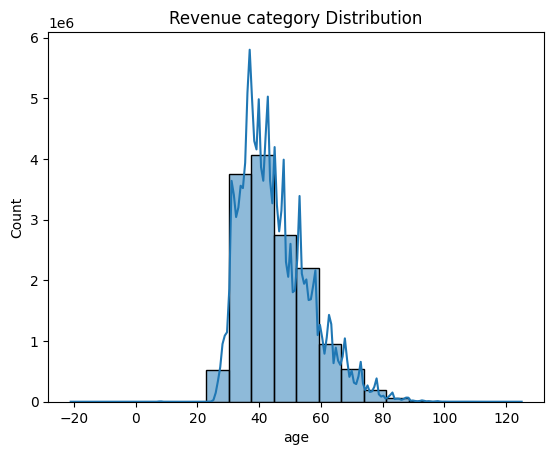

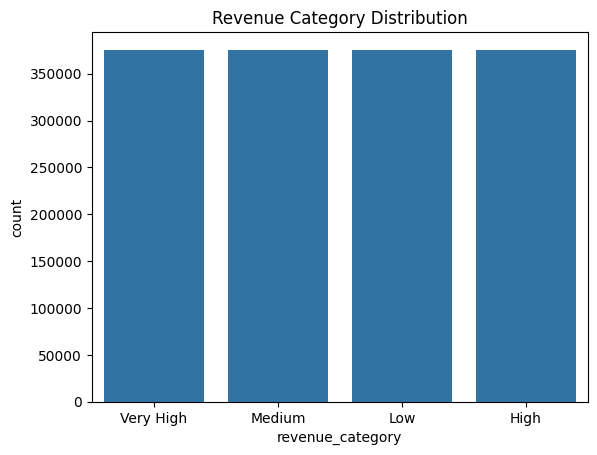

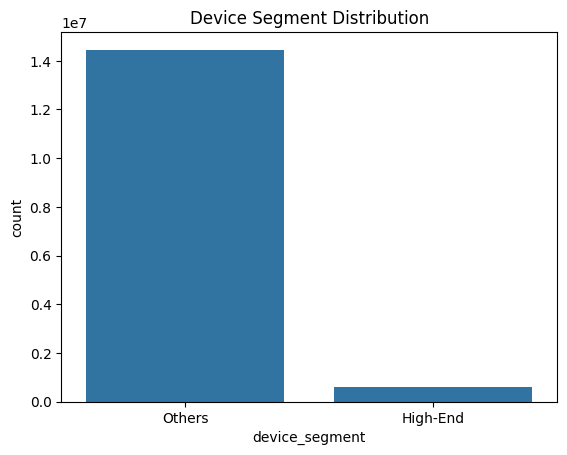

In [ ]:
# distribution plots
import seaborn as sns
import matplotlib.pylab as plt

# age distribution
sns.histplot(df['age'], bins=20,kde=True)
plt.title("Revenue category Distribution")
plt.show()


# Revnue category count
sns.countplot(data=df,x='revenue_category')
plt.title("Revenue Category Distribution")
plt.show()

# Device segment
sns.countplot(data=df,x='device_segment')
plt.title("Device Segment Distribution")
plt.show()

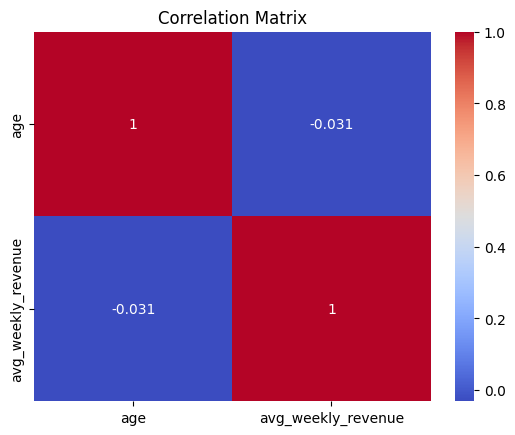

In [ ]:
# Correlation matrix 
numeric_cols = ['age','avg_weekly_revenue']
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

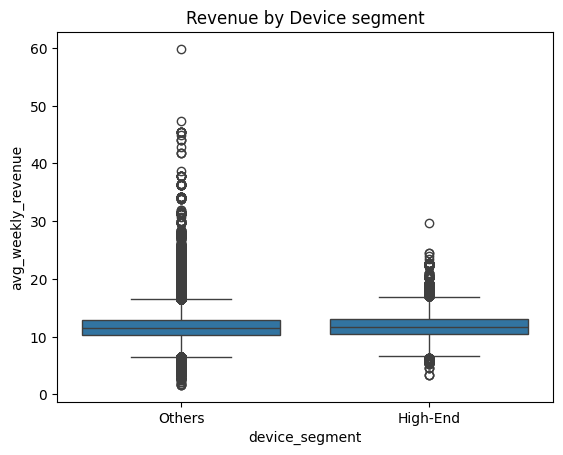

In [ ]:
# handle outliers  or Grouped views
# boxplot of revenue by device segment

sns.boxplot(x='device_segment',y='avg_weekly_revenue',data=df)
plt.title("Revenue by Device segment")
plt.show()

In [ ]:
# revenue by segment over weeks
pivot_table = df.pivot_table(
    values='revenue_usd',
    index='segment',
    columns='week',
    aggfunc='sum'
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,annot=True,fmt=".0f",cmap='YlGnBu')
plt.title("Weekly Revenue by segment")
plt.show()

KeyError: 'segment'

In [ ]:
print(df.columns.tolist())

['msisdn', 'gender', 'year_of_birth', 'system_status', 'mobile_type', 'value_segment', 'imei_tac', 'brand_name', 'model_name', 'os_name', 'os_vendor', 'week_number', 'revenue_usd', 'age', 'device_segment', 'avg_weekly_revenue', 'is_gender_missing', 'revenue_category']


In [ ]:
cust_df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\Revenue_leakage and KPI analytics project\data\cleaned\customer_df.csv")
device_df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\Revenue_leakage and KPI analytics project\data\cleaned\device_data.csv")
rev_df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\Revenue_leakage and KPI analytics project\data\cleaned\Revenue_data.csv")
merged_df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data analysis\Revenue_leakage and KPI analytics project\data\cleaned\merged_data.csv")

print("\n customer data file columns are :",cust_df.columns.tolist())
print("\n Device data file columns are :",device_df.columns.tolist())
print("\n Revenue data file columns are :",rev_df.columns.tolist())
print("\n merged data file columns are :",merged_df.columns.tolist())


 customer data file columns are : ['Unnamed: 0', 'msisdn', 'gender', 'year_of_birth', 'system_status', 'mobile_type', 'value_segment']

 Device data file columns are : ['Unnamed: 0', 'msisdn', 'imei_tac', 'brand_name', 'model_name', 'os_name', 'os_vendor']

 Revenue data file columns are : ['Unnamed: 0', 'msisdn', 'week_number', 'revenue_usd']

 merged data file columns are : ['msisdn', 'gender', 'year_of_birth', 'system_status', 'mobile_type', 'value_segment', 'imei_tac', 'brand_name', 'model_name', 'os_name', 'os_vendor', 'week_number', 'revenue_usd']


In [14]:
# how revenue changes over time(by week) to identify pattern, decline ,seasonality

# check for missing values
print("missing values :",df[['week_number','revenue_usd']].isnull().sum())

missing values : week_number    13543945
revenue_usd    13543945
dtype: int64


In [15]:
# drop rows where week_number or revenue_usd in NAN

df_clean = df.dropna(subset=['week_number','revenue_usd'])

In [16]:
# convert to appropriate types
df_clean['week_number']  = df_clean['week_number'].astype(int)
df_clean['revenue_usd'] = df_clean['revenue_usd'].astype(float)

C:\Users\harsh\AppData\Local\Temp\ipykernel_18988\1373461746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['week_number']  = df_clean['week_number'].astype(int)
C:\Users\harsh\AppData\Local\Temp\ipykernel_18988\1373461746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['revenue_usd'] = df_clean['revenue_usd'].astype(float)


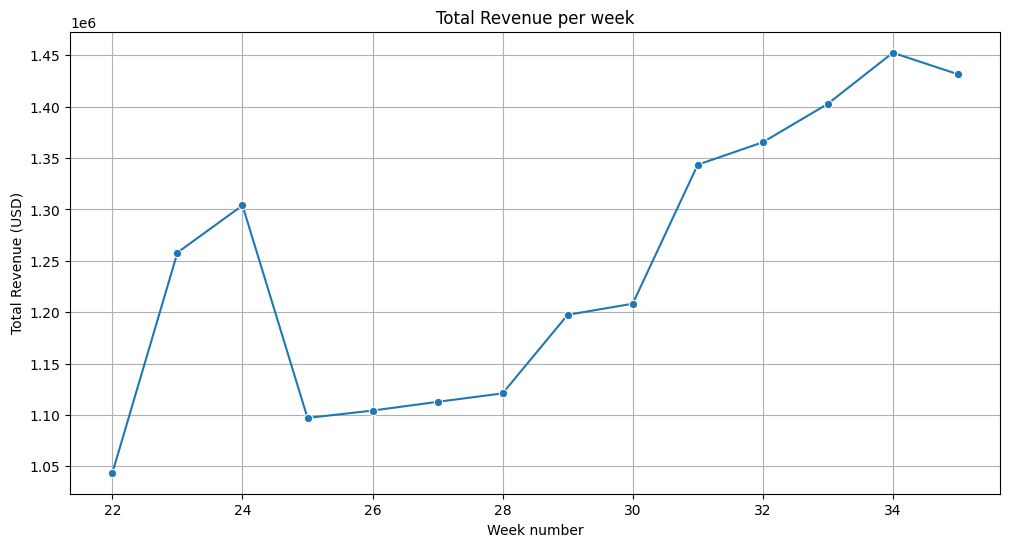

In [17]:

# total revenue per week
weekly_revenue = df_clean.groupby('week_number')['revenue_usd'].sum().reset_index()

# average revenue per user per week
weekly_avg_revenue = df_clean.groupby('week_number')['revenue_usd'].mean().reset_index()

# plot total revenue per week

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_revenue,x='week_number',y='revenue_usd',marker='o')
plt.title("Total Revenue per week")
plt.xlabel('Week number')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()




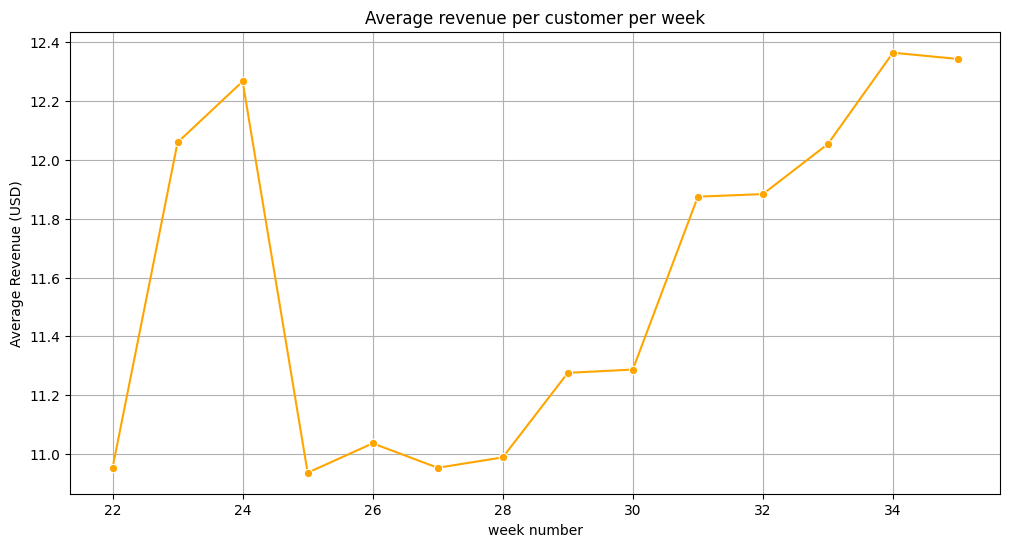

In [18]:
# plot average revenue per customer per week
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_avg_revenue,x='week_number',y='revenue_usd',marker='o',color='orange')
plt.title("Average revenue per customer per week")
plt.xlabel('week number')
plt.ylabel('Average Revenue (USD)')
plt.grid(True)
plt.show()

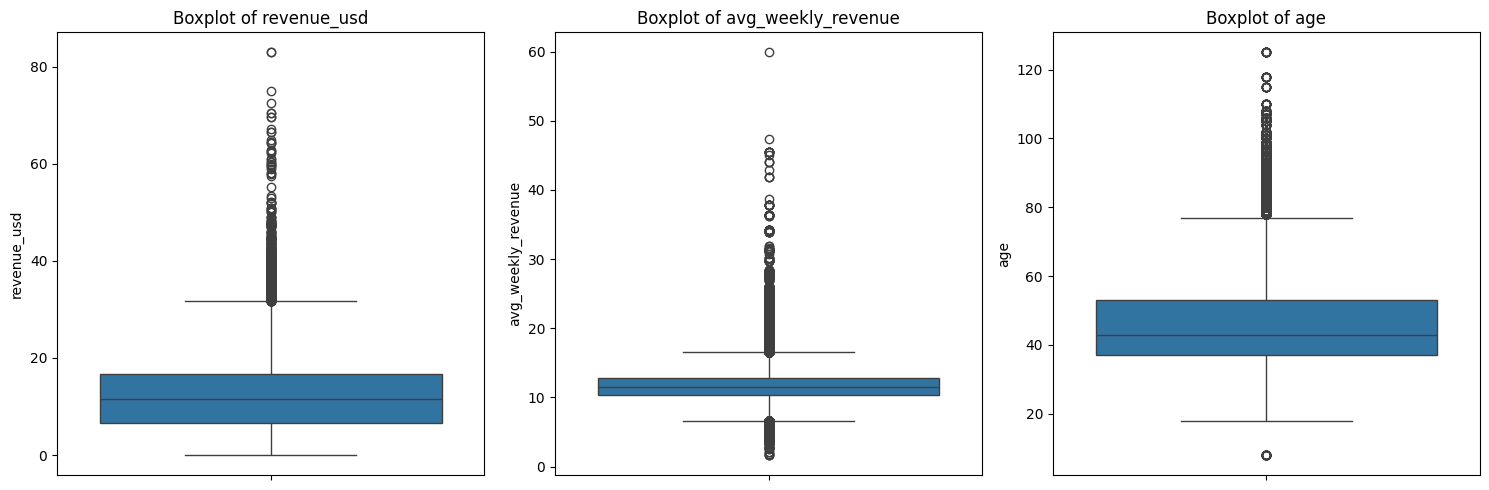

In [19]:
# outlier detection

num_cols =['revenue_usd','avg_weekly_revenue','age']
df_num = df[num_cols].dropna()

# boxplot to visually check for outliers
plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_num[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [20]:
def flag_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Flag revenue_usd outliers
df['is_revenue_outlier'] = flag_outliers(df['revenue_usd'])
df['is_avg_rev_outlier'] = flag_outliers(df['avg_weekly_revenue'])

# Print number of outliers
print("Revenue USD Outliers:", df['is_revenue_outlier'].sum())
print("Avg Weekly Revenue Outliers:", df['is_avg_rev_outlier'].sum())


Revenue USD Outliers: 933
Avg Weekly Revenue Outliers: 22688


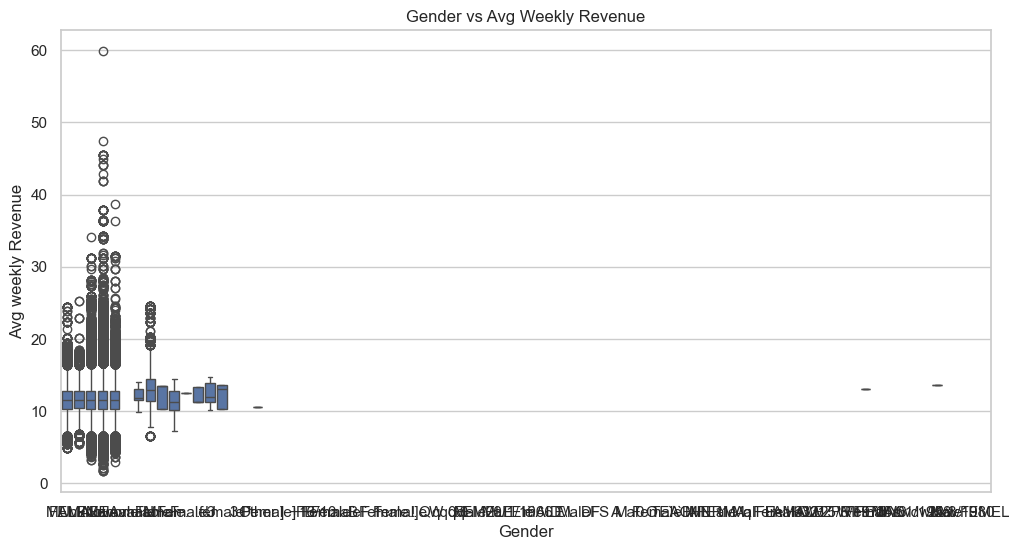

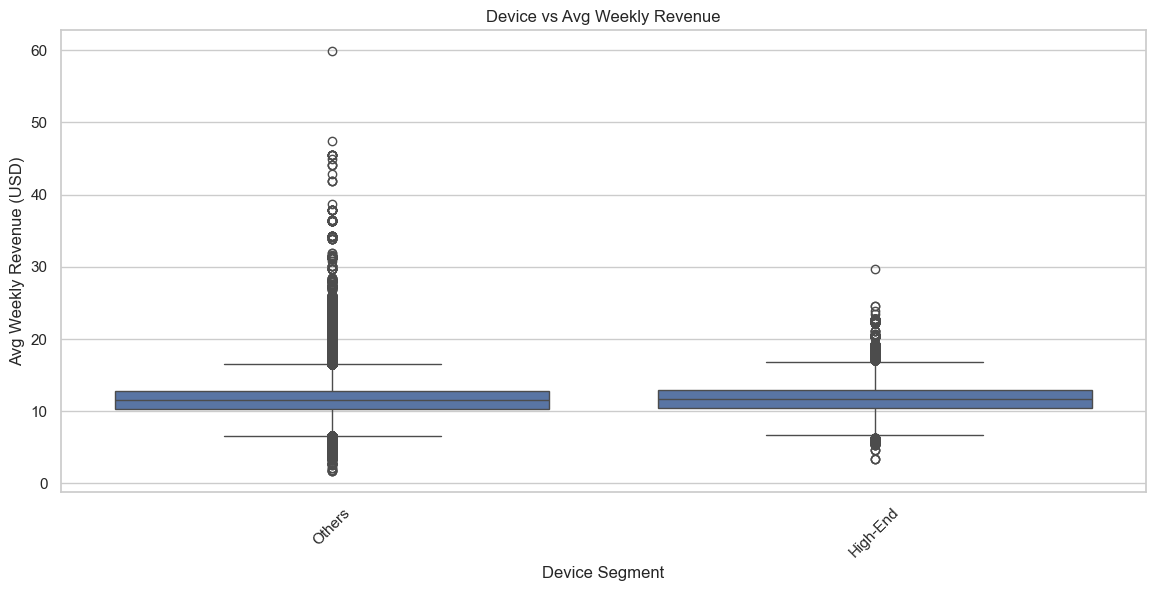

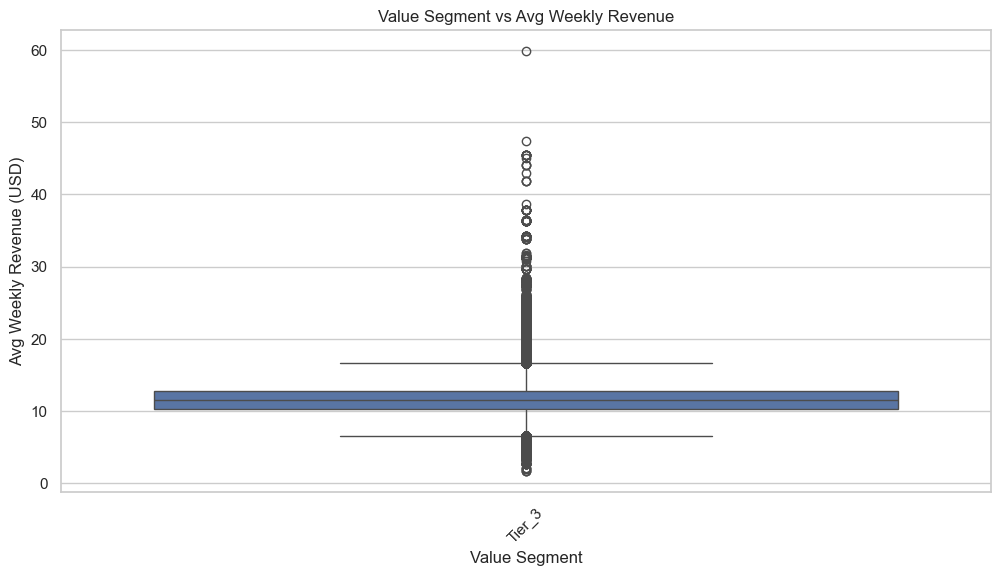

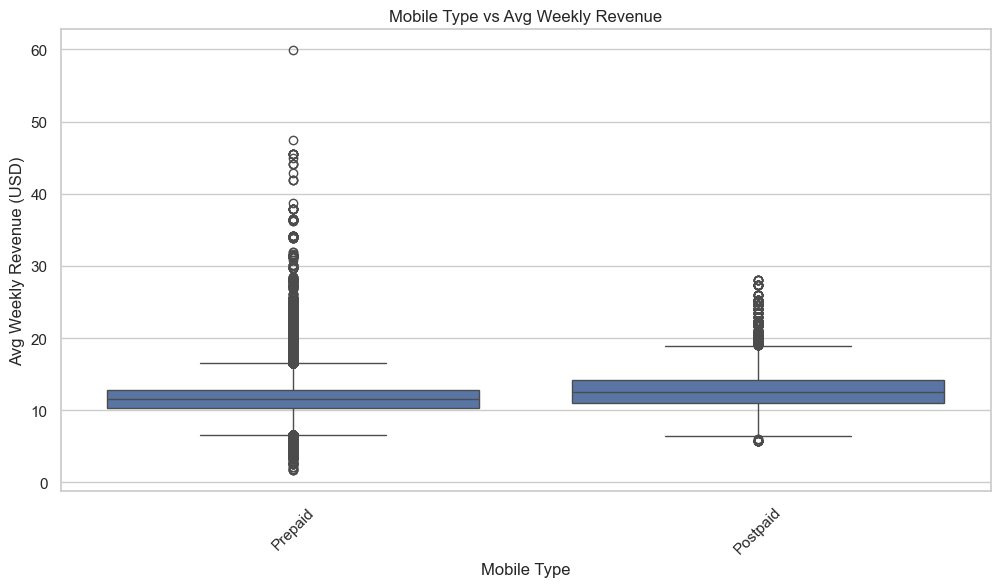

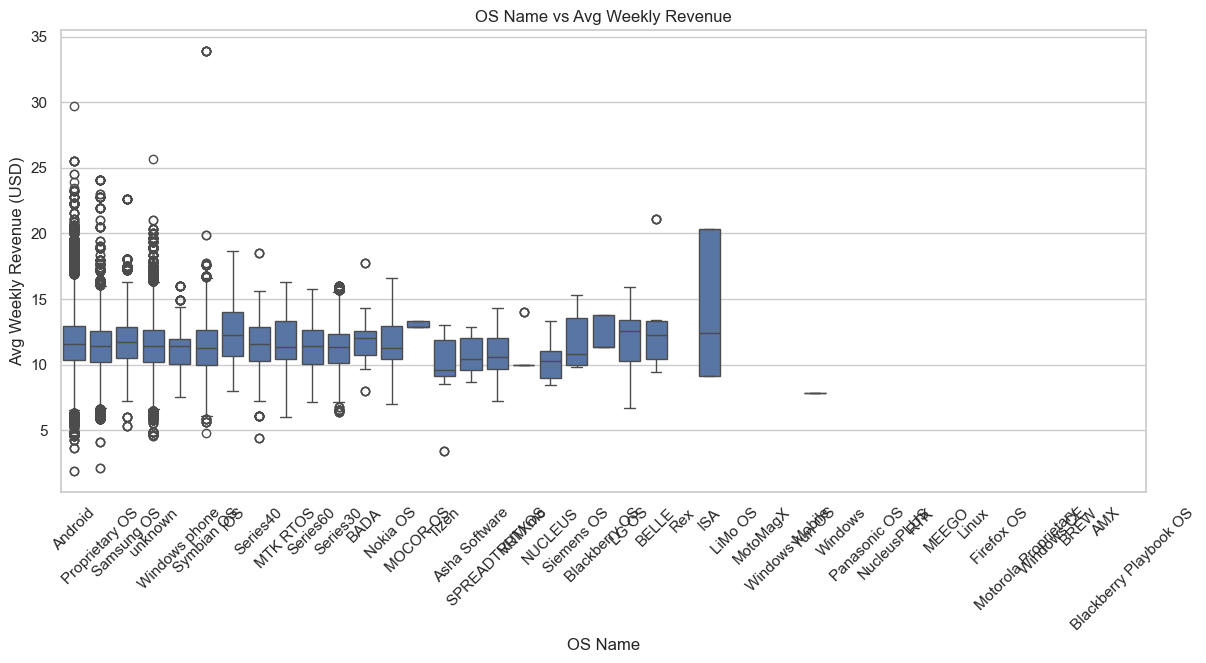

In [21]:
# segmentation
# set style
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# gender vs avg weekly revenue
sns.boxplot(x='gender',y='avg_weekly_revenue',data=df)
plt.title("Gender vs Avg Weekly Revenue")
plt.xlabel('Gender')
plt.ylabel('Avg weekly Revenue')
plt.show()

# Device segment vs Avg wekly Revenue
plt.figure(figsize=(14,6))
sns.boxplot(data = df, x='device_segment',y='avg_weekly_revenue')
plt.title('Device vs Avg Weekly Revenue')
plt.xticks(rotation=45)
plt.ylabel('Avg Weekly Revenue (USD)')
plt.xlabel('Device Segment')
plt.show()

# Value Segment vs Avg Weekly Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='value_segment', y='avg_weekly_revenue', data=df)
plt.title('Value Segment vs Avg Weekly Revenue')
plt.xticks(rotation=45)
plt.ylabel('Avg Weekly Revenue (USD)')
plt.xlabel('Value Segment')
plt.show()

# 4. Mobile Type vs Avg Weekly Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='mobile_type', y='avg_weekly_revenue', data=df)
plt.title('Mobile Type vs Avg Weekly Revenue')
plt.xticks(rotation=45)
plt.ylabel('Avg Weekly Revenue (USD)')
plt.xlabel('Mobile Type')
plt.show()

# 5. OS Name vs Avg Weekly Revenue
plt.figure(figsize=(14, 6))
sns.boxplot(x='os_name', y='avg_weekly_revenue', data=df)
plt.title('OS Name vs Avg Weekly Revenue')
plt.xticks(rotation=45)
plt.ylabel('Avg Weekly Revenue (USD)')
plt.xlabel('OS Name')
plt.show()